## Overview

This notebook uses a basic example to illustrate why we need to limit how many features we are using for certain algorithms that involve computing distance.

**Code source:**
The following code logic has been taken from (I did change the implementation a little):

Data Science from Scratch, Second Edition

p. 170 - 172

Joel Grus 

O'Reilly

In [1]:
import random
import tqdm
import numpy as np
from typing import List
from scipy.spatial.distance import pdist

In [2]:
Vector = List[float]

def random_point(dim: int) -> np.array:
    return np.array([random.random() for _ in range(dim)])

def sum_of_squares(a: np.array, b: np.array) -> np.array:
    return sum(a_i * b_i for a_i, b_i in zip(a, b))

def euclidean_distance(a, b):
    return np.sqrt(sum_of_squares(a, b))

In [3]:
def random_distances(dim: int, num_pairs: int) -> List[float]:
    return [euclidean_distance(random_point(dim), random_point(dim)) 
           for _ in range(num_pairs)]

In [4]:
import tqdm
dimensions = range(1, 101)

avg_distances = []
min_distances = []

random.seed(0)

for dim in tqdm.tqdm(dimensions, desc="Curse of Dimenstionality"):
    distances = random_distances(dim, 10000)      # 10,000 random pairs
    avg_distances.append(sum(distances) / 10000)  # track the average
    min_distances.append(min(distances))          # track the minimum

Curse of Dimenstionality: 100%|██████████████████████████████████████████████████████| 100/100 [01:31<00:00,  1.09it/s]


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [17]:
data = pd.DataFrame(data={"dimensions":range(1, 101),
                   "average":avg_distances,
                   "minimum":min_distances})

data["min_avg_ratio"] = data["minimum"] / data["average"]

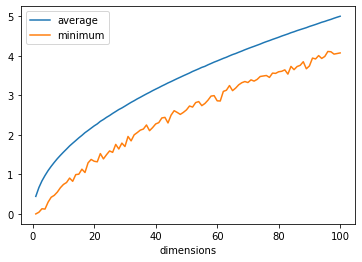

In [16]:
data.plot(x="dimensions", y=["average", "minimum"])
plt.show()

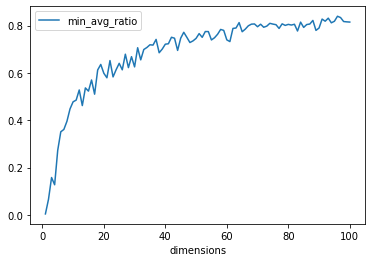

In [18]:
data.plot(x="dimensions", y="min_avg_ratio")